<a href="https://colab.research.google.com/github/trzxf/Machine_learning/blob/main/Deep%20Learning(non-image).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training RNN...
Epoch 1/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0075 - val_loss: 3.4027e-04
Epoch 2/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.6726e-04 - val_loss: 2.3995e-04
Epoch 3/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.0324e-04 - val_loss: 2.6883e-04
Epoch 4/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 3.5516e-04 - val_loss: 1.9355e-04
Epoch 5/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.4717e-04 - val_loss: 2.1059e-04
Epoch 6/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 3.2604e-04 - val_loss: 1.7819e-04
Epoch 7/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.2087e-04 - val_loss: 1.7996e-04
Epoch 8/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 3.1540e-04 - val_loss: 2.0052e-04
Epoch 9/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 3.1442e-04 - val_loss: 1.7221e-04
Epoch 10/50
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.1279e-04 - val_loss: 1.8832e-04
Epoch 11/50
1185/1185 ━

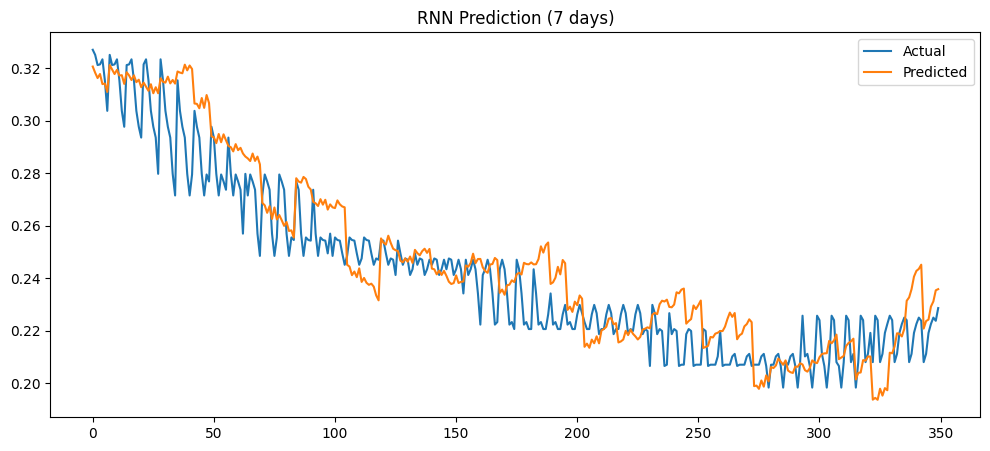

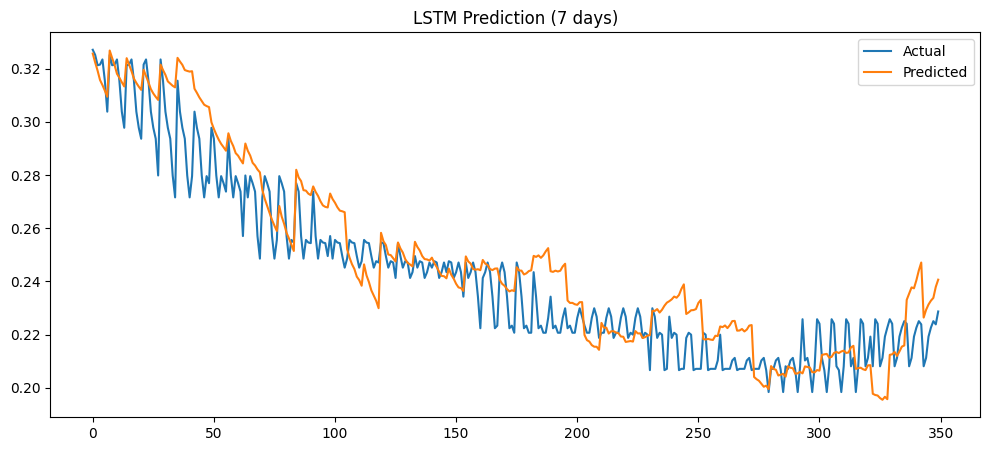

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load & Preprocess Dataset
df = pd.read_csv('cleaned_weather.csv', parse_dates=['date'])
df = df[['date', 'T']].dropna()
df = df.sort_values('date')

# 2. Scaling
scaler = MinMaxScaler()
df['T_scaled'] = scaler.fit_transform(df[['T']])

# 3. Sequence generation: 30 hari input → 7 hari output
def create_sequences(data, input_len=30, output_len=7):
    X, y = [], []
    for i in range(len(data) - input_len - output_len + 1):
        X.append(data[i:i+input_len])
        y.append(data[i+input_len:i+input_len+output_len])
    return np.array(X), np.array(y)

series = df['T_scaled'].values
X, y = create_sequences(series, input_len=30, output_len=7)

# 4. Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train[..., np.newaxis]  # shape: (samples, 30, 1)
X_test = X_test[..., np.newaxis]

# 5. Build RNN & LSTM models
def build_rnn(input_shape, output_len):
    model = Sequential([
        SimpleRNN(64, activation='tanh', input_shape=input_shape),
        Dense(output_len)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm(input_shape, output_len):
    model = Sequential([
        LSTM(64, activation='tanh', input_shape=input_shape),
        Dense(output_len)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# 6. Train models
es = EarlyStopping(patience=5, restore_best_weights=True)

model_rnn = build_rnn((30, 1), 7)
model_lstm = build_lstm((30, 1), 7)

print("Training RNN...")
model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[es], verbose=1)

print("Training LSTM...")
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[es], verbose=1)

# 7. Evaluation
def evaluate(model, X, y, name):
    pred = model.predict(X)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mean_squared_error(y, pred))
    print(f"{name} → MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    return pred

y_pred_rnn = evaluate(model_rnn, X_test, y_test, "RNN")
y_pred_lstm = evaluate(model_lstm, X_test, y_test, "LSTM")

# 8. Plot
def plot_result(y_true, y_pred, title):
    plt.figure(figsize=(12,5))
    plt.plot(y_true[:50].flatten(), label='Actual')
    plt.plot(y_pred[:50].flatten(), label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

plot_result(y_test, y_pred_rnn, "RNN Prediction (7 days)")
plot_result(y_test, y_pred_lstm, "LSTM Prediction (7 days)")


Nama  : Tubagus Pratama Julianto  
NIM   : 4.33.23.0.26    
Kelas : TI-2A


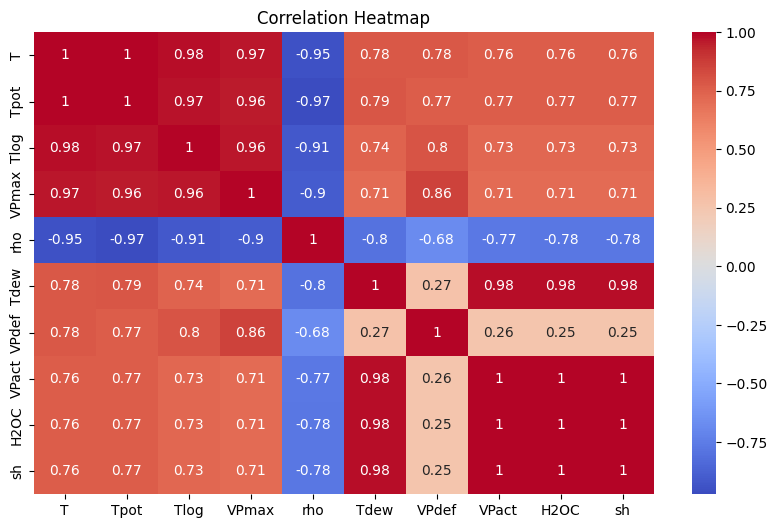


🔁 Training Model: RNN

Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0244 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.1965e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.4490e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.1410e-04 - val_loss: 9.1048e-04 - learning_rate: 0.0010
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.9428e-04 - val_loss: 8.5075e-04 - learning_rate: 0.0010
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.3907e-04 - val_loss: 8.2369e-04 - learning_rate: 0.0010
Epoch 7/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.3933e-04 - val_loss: 8.4123e-04 - learning_rate: 0.0010
Epoch 8/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.3131e-04 - val_loss: 7.1437e-04 - learning_rate: 0.0010
Epoch 9/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.

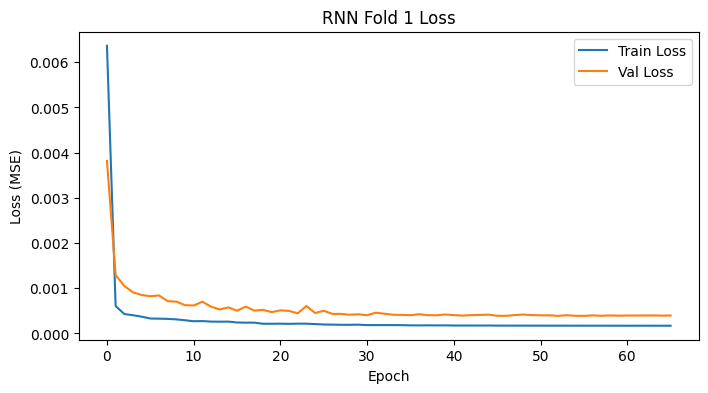

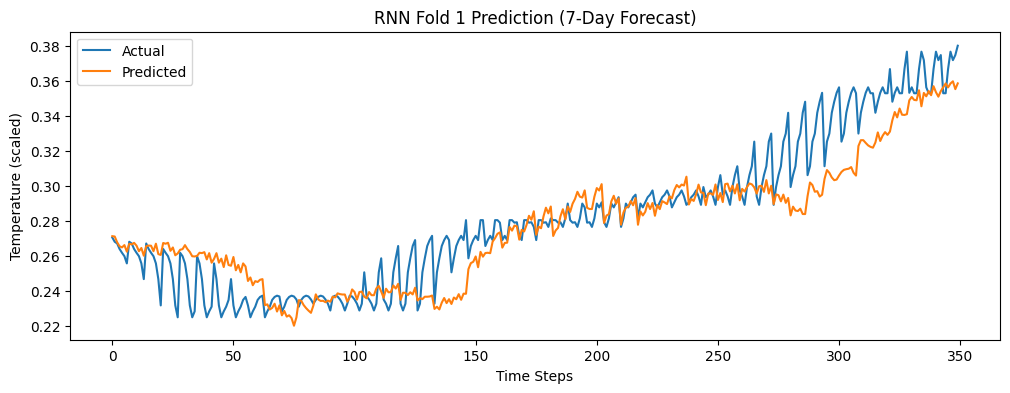


Fold 2
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


549/549 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0141 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 2/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.1193e-04 - val_loss: 9.9932e-04 - learning_rate: 0.0010
Epoch 3/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.4202e-04 - val_loss: 7.6638e-04 - learning_rate: 0.0010
Epoch 4/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.8228e-04 - val_loss: 6.7343e-04 - learning_rate: 0.0010
Epoch 5/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.2134e-04 - val_loss: 5.8802e-04 - learning_rate: 0.0010
Epoch 6/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.1474e-04 - val_loss: 5.2610e-04 - learning_rate: 0.0010
Epoch 7/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.9699e-04 - val_loss: 4.6231e-04 - learning_rate: 0.0010
Epoch 8/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.9781e-04 - val_loss: 4.8699e-04 - learning_rate: 0.0010
Epoch 9/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.7837e

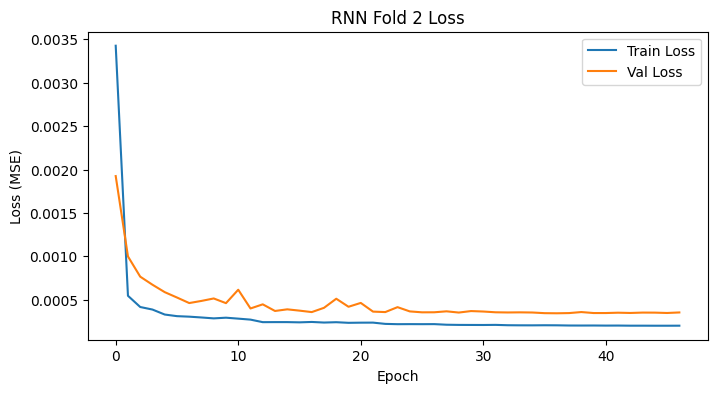

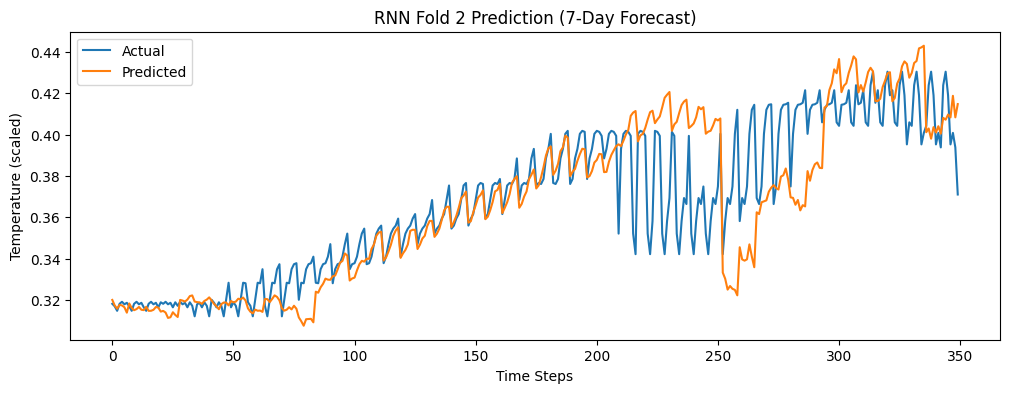


Fold 3
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


823/823 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0134 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 2/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 5.6978e-04 - val_loss: 5.7699e-04 - learning_rate: 0.0010
Epoch 3/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.2911e-04 - val_loss: 5.2970e-04 - learning_rate: 0.0010
Epoch 4/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.0469e-04 - val_loss: 5.6387e-04 - learning_rate: 0.0010
Epoch 5/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.7315e-04 - val_loss: 5.5168e-04 - learning_rate: 0.0010
Epoch 6/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.6146e-04 - val_loss: 6.0418e-04 - learning_rate: 0.0010
Epoch 7/100
816/823 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2610e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
823/823 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2615e-04 - val_loss: 8.7942e-04 - learning_rate: 0.0010
Epoch 8/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/ste

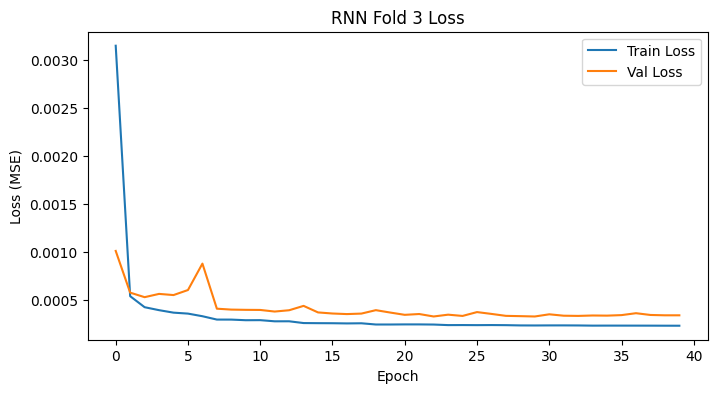

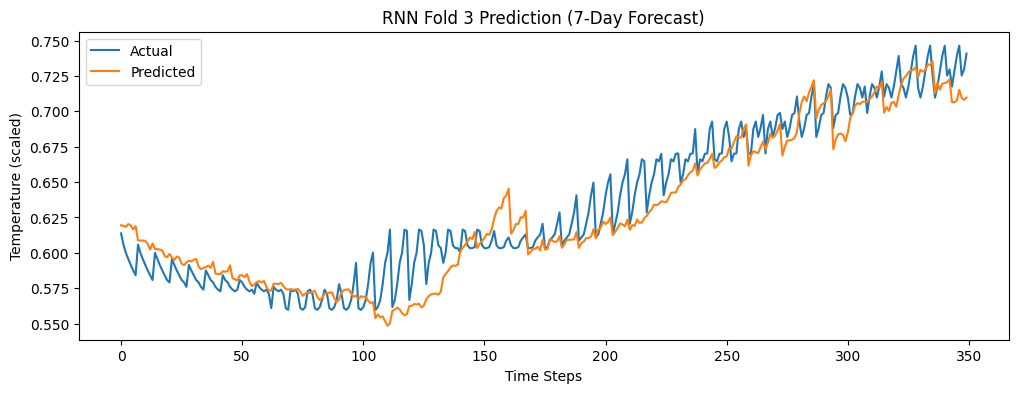


Fold 4
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0143 - val_loss: 6.7143e-04 - learning_rate: 0.0010
Epoch 2/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 5.4624e-04 - val_loss: 3.7786e-04 - learning_rate: 0.0010
Epoch 3/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.0109e-04 - val_loss: 3.3465e-04 - learning_rate: 0.0010
Epoch 4/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.5116e-04 - val_loss: 5.7110e-04 - learning_rate: 0.0010
Epoch 5/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.9033e-04 - val_loss: 6.6718e-04 - learning_rate: 0.0010
Epoch 6/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.3628e-04 - val_loss: 4.7015e-04 - learning_rate: 0.0010
Epoch 7/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.3037e-04 - val_loss: 2.0652e-04 - learning_rate: 0.0010
Epoch 8/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.0808e-04 - val_loss: 4.7017e-04 - learning_rate: 0.0010
Epoch 9/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 6s 4m

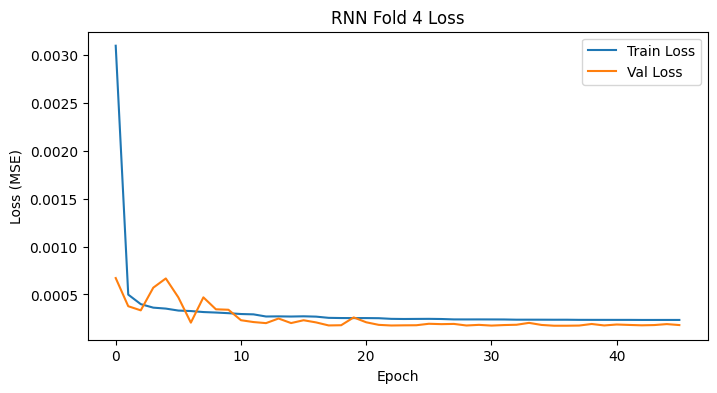

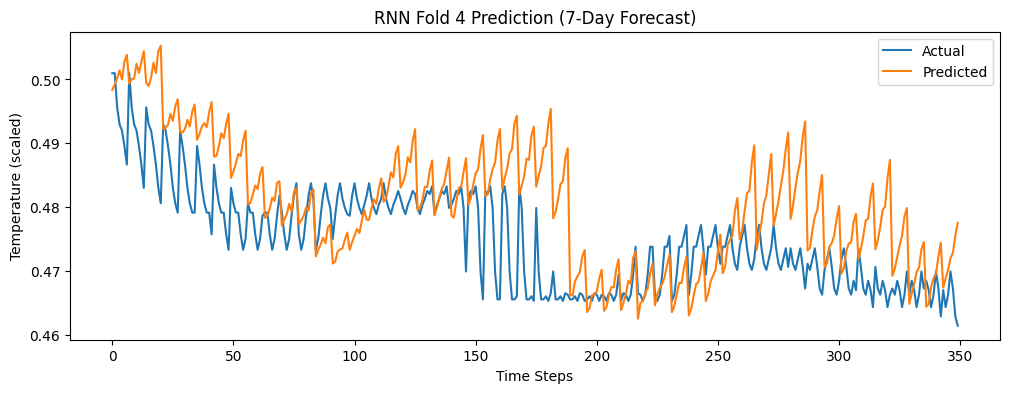


Fold 5
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1372/1372 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0096 - val_loss: 3.2573e-04 - learning_rate: 0.0010
Epoch 2/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.4917e-04 - val_loss: 2.2419e-04 - learning_rate: 0.0010
Epoch 3/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3.6776e-04 - val_loss: 3.5194e-04 - learning_rate: 0.0010
Epoch 4/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.3905e-04 - val_loss: 1.7607e-04 - learning_rate: 0.0010
Epoch 5/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 3.1539e-04 - val_loss: 1.6715e-04 - learning_rate: 0.0010
Epoch 6/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.0478e-04 - val_loss: 2.2844e-04 - learning_rate: 0.0010
Epoch 7/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0292e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.0291e-04 - val_loss: 3.1861e-04 - learning_rate: 0.0010
Epoch 8/100
1372/1372 ━━━━━━━━

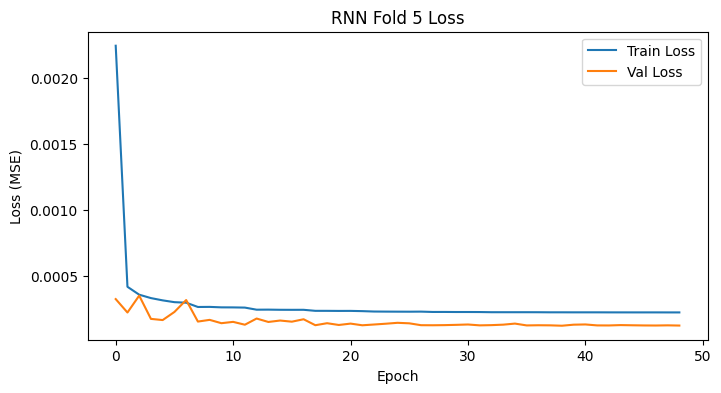

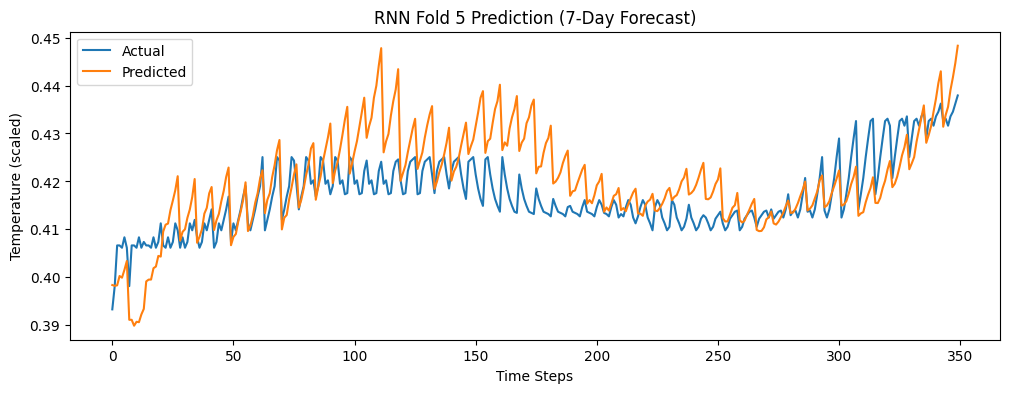


🔁 Training Model: LSTM

Fold 1
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0084 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 5.2390e-04 - val_loss: 7.6843e-04 - learning_rate: 0.0010
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.6970e-04 - val_loss: 6.3821e-04 - learning_rate: 0.0010
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.2004e-04 - val_loss: 6.0409e-04 - learning_rate: 0.0010
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3.0226e-04 - val_loss: 5.3499e-04 - learning_rate: 0.0010
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.7042e-04 - val_loss: 5.5835e-04 - learning_rate: 0.0010
Epoch 7/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.6223e-04 - val_loss: 6.1430e-04 - learning_rate: 0.0010
Epoch 8/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.5291e-04 - val_loss: 4.1653e-04 - learning_rate: 0.0010
Epoch 9/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss

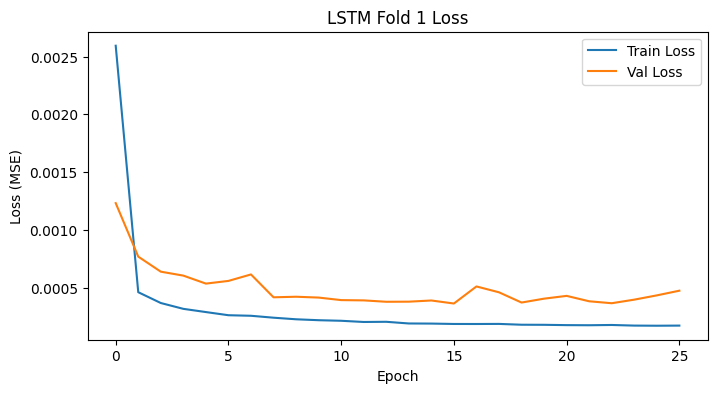

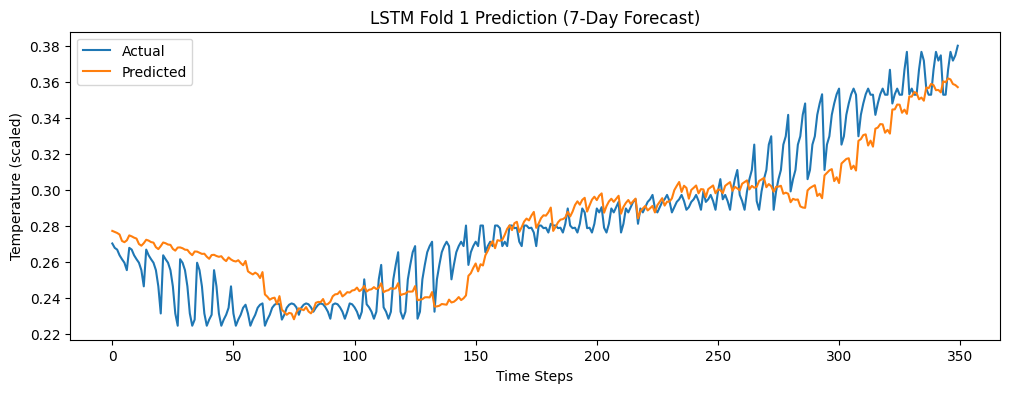


Fold 2
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


549/549 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0101 - val_loss: 7.9797e-04 - learning_rate: 0.0010
Epoch 2/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.4887e-04 - val_loss: 8.9798e-04 - learning_rate: 0.0010
Epoch 3/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3.8354e-04 - val_loss: 4.0823e-04 - learning_rate: 0.0010
Epoch 4/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.1521e-04 - val_loss: 3.7632e-04 - learning_rate: 0.0010
Epoch 5/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.0176e-04 - val_loss: 4.2891e-04 - learning_rate: 0.0010
Epoch 6/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 2.8235e-04 - val_loss: 4.2765e-04 - learning_rate: 0.0010
Epoch 7/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.7881e-04 - val_loss: 3.8384e-04 - learning_rate: 0.0010
Epoch 8/100
539/549 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6622e-04
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms

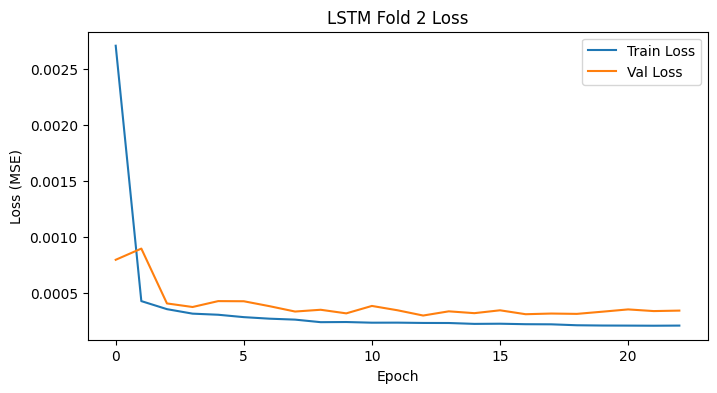

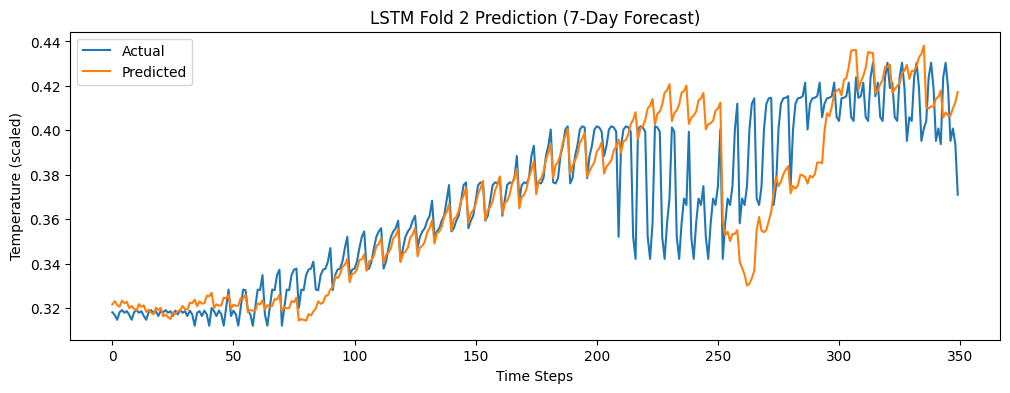


Fold 3
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


823/823 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0092 - val_loss: 5.0769e-04 - learning_rate: 0.0010
Epoch 2/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.4611e-04 - val_loss: 4.0706e-04 - learning_rate: 0.0010
Epoch 3/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.5472e-04 - val_loss: 5.4009e-04 - learning_rate: 0.0010
Epoch 4/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 3.2790e-04 - val_loss: 5.2000e-04 - learning_rate: 0.0010
Epoch 5/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.9760e-04 - val_loss: 3.2223e-04 - learning_rate: 0.0010
Epoch 6/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.0037e-04 - val_loss: 3.3430e-04 - learning_rate: 0.0010
Epoch 7/100
813/823 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6788e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
823/823 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 2.6789e-04 - val_loss: 8.9110e-04 - learning_rate: 0.0010
Epoch 8/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 6s 7

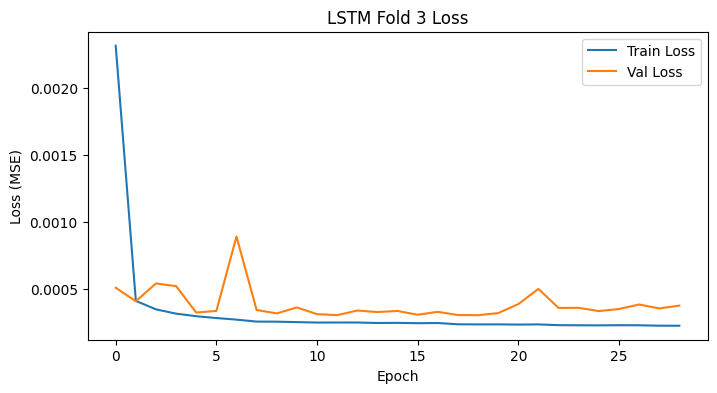

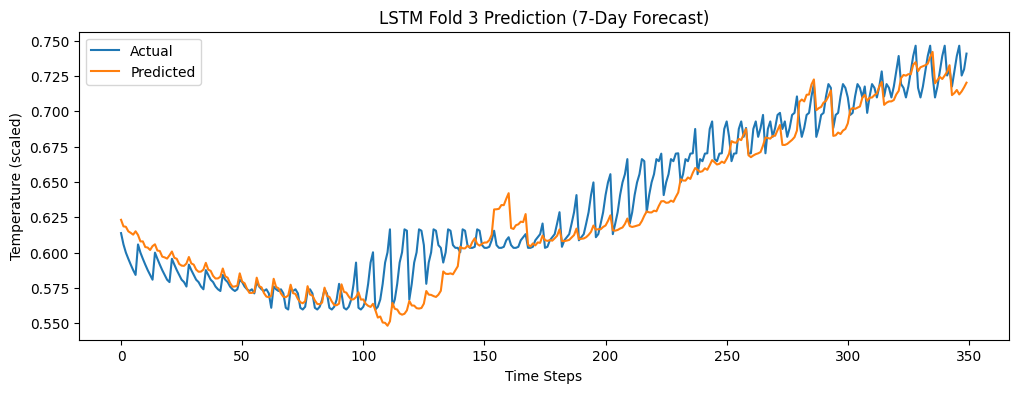


Fold 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0099 - val_loss: 3.3558e-04 - learning_rate: 0.0010
Epoch 2/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.4923e-04 - val_loss: 3.4674e-04 - learning_rate: 0.0010
Epoch 3/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.7269e-04 - val_loss: 2.4486e-04 - learning_rate: 0.0010
Epoch 4/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.3660e-04 - val_loss: 2.1360e-04 - learning_rate: 0.0010
Epoch 5/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.0319e-04 - val_loss: 2.6425e-04 - learning_rate: 0.0010
Epoch 6/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 3.0271e-04 - val_loss: 1.9355e-04 - learning_rate: 0.0010
Epoch 7/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 2.9052e-04 - val_loss: 1.9333e-04 - learning_rate: 0.0010
Epoch 8/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 2.8505e-04 - val_loss: 2.7147e-04 - learning_rate: 0.0010
Epoch 9/100
1089/1098 ━━━━━━━━━━

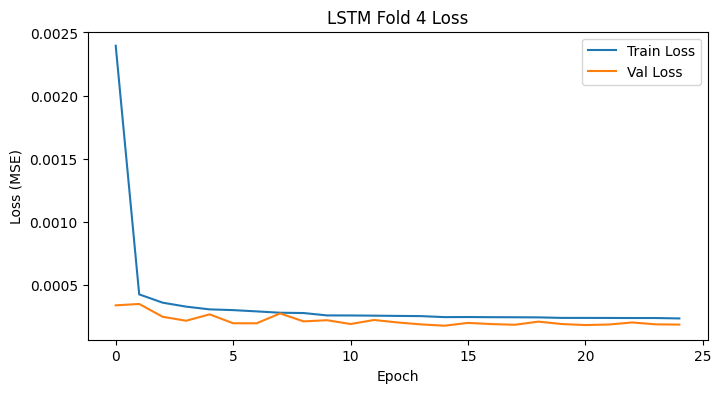

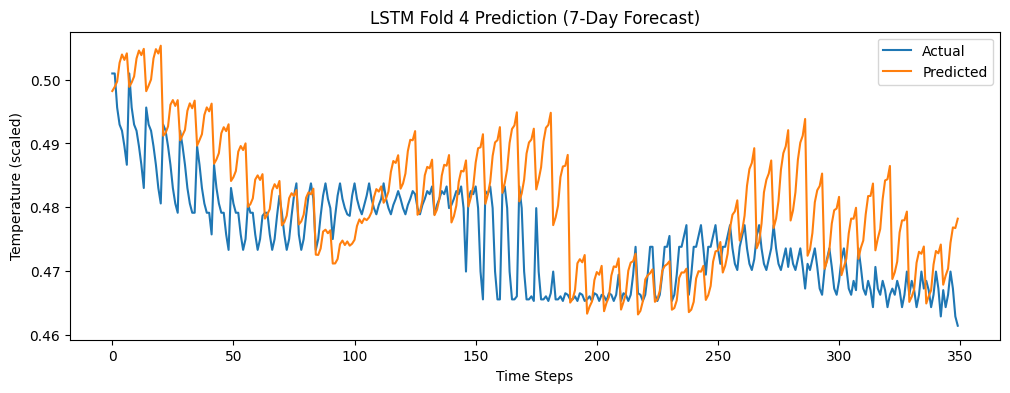


Fold 5
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1372/1372 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0057 - val_loss: 5.2300e-04 - learning_rate: 0.0010
Epoch 2/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 3.9284e-04 - val_loss: 2.0087e-04 - learning_rate: 0.0010
Epoch 3/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.2495e-04 - val_loss: 2.0059e-04 - learning_rate: 0.0010
Epoch 4/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 3.0974e-04 - val_loss: 1.9584e-04 - learning_rate: 0.0010
Epoch 5/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 2.8555e-04 - val_loss: 1.8654e-04 - learning_rate: 0.0010
Epoch 6/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 2.8728e-04 - val_loss: 2.2463e-04 - learning_rate: 0.0010
Epoch 7/100
1369/1372 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6616e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 2.6616e-04 - val_loss: 2.0837e-04 - learning_rate: 0.0010
Epoch 8/100
1372/1372 ━━━━━━

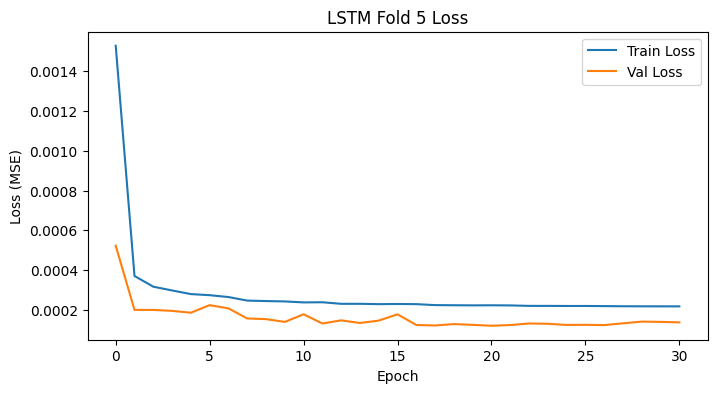

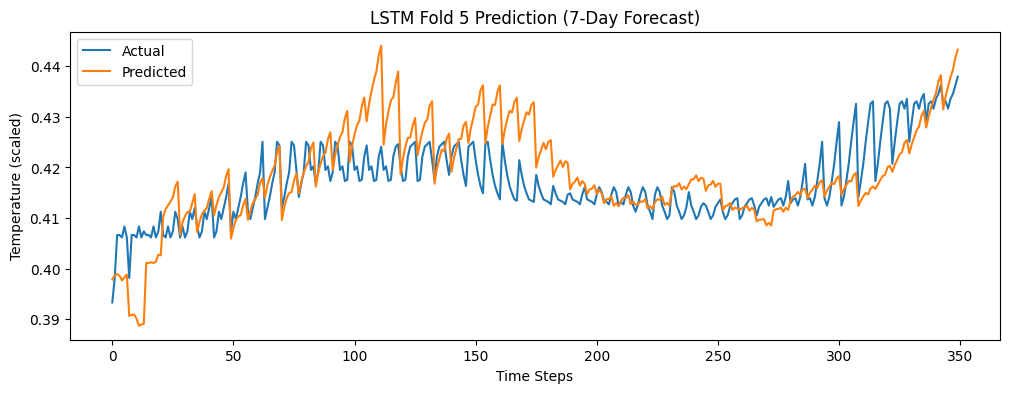

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 2. Load Dataset
df = pd.read_csv('cleaned_weather.csv', parse_dates=['date'])
df = df[['date', 'T', 'Tpot', 'Tlog', 'VPmax', 'rho', 'Tdew', 'VPdef', 'VPact', 'H2OC', 'sh']].dropna()
df = df.sort_values('date')

# 3. Heatmap Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['date']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Feature Scaling
features = ['Tpot', 'Tlog', 'VPmax', 'rho', 'Tdew', 'VPdef', 'VPact', 'H2OC', 'sh']
target = 'T'
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features + [target]] = scaler.fit_transform(df[features + [target]])

# 5. Buat Sequence 30 Hari → 7 Hari
def create_sequences(data, feature_cols, target_col, input_len=30, output_len=7):
    X, y = [], []
    for i in range(len(data) - input_len - output_len + 1):
        X.append(data[feature_cols].iloc[i:i+input_len].values)
        y.append(data[target_col].iloc[i+input_len:i+input_len+output_len].values)
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled, features, target, input_len=30, output_len=7)

# 6. TimeSeriesSplit Cross Validation
tscv = TimeSeriesSplit(n_splits=5)

def build_model(model_type, input_shape, output_len):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(64, activation='tanh', input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(64, activation='tanh', input_shape=input_shape))
    model.add(Dense(output_len))
    model.compile(optimizer='adam', loss='mse')
    return model

# 7. Training & Evaluasi per Fold
for model_type in ['RNN', 'LSTM']:
    print(f"\n🔁 Training Model: {model_type}")
    fold = 1
    for train_index, val_index in tscv.split(X):
        print(f"\nFold {fold}")
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = build_model(model_type, (X.shape[1], X.shape[2]), y.shape[1])

        # Callbacks
        callbacks = [
            EarlyStopping(patience=10, restore_best_weights=True),
            ModelCheckpoint(f'{model_type}_fold{fold}.keras', save_best_only=True),
            ReduceLROnPlateau(patience=5, factor=0.5, verbose=1)
        ]

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=100,
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )

        # Evaluation
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        print(f"📊 Fold {fold} Results - {model_type}")
        print(f"MAE:  {mae:.4f}")
        print(f"MSE:  {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R²:   {r2:.4f}")

        # Visualisasi Loss
        plt.figure(figsize=(8, 4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{model_type} Fold {fold} Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.show()

        # Visualisasi Prediksi
        plt.figure(figsize=(12, 4))
        plt.plot(y_val[:50].flatten(), label='Actual')
        plt.plot(y_pred[:50].flatten(), label='Predicted')
        plt.title(f'{model_type} Fold {fold} Prediction (7-Day Forecast)')
        plt.xlabel('Time Steps')
        plt.ylabel('Temperature (scaled)')
        plt.legend()
        plt.show()

        fold += 1


                                date             T
count                          52696  52696.000000
mean   2020-07-02 00:11:52.198269440     10.818241
min              2020-01-01 00:10:00     -6.440000
25%              2020-04-01 11:47:30      4.590000
50%              2020-07-02 00:45:00     10.230000
75%              2020-10-01 12:22:30     16.180000
max              2021-01-01 00:00:00     34.800000
std                              NaN      7.468671
date    0
T       0
dtype: int64


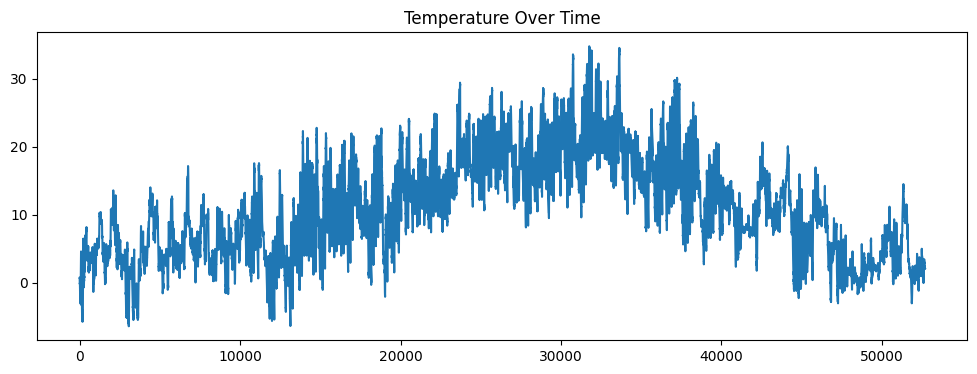

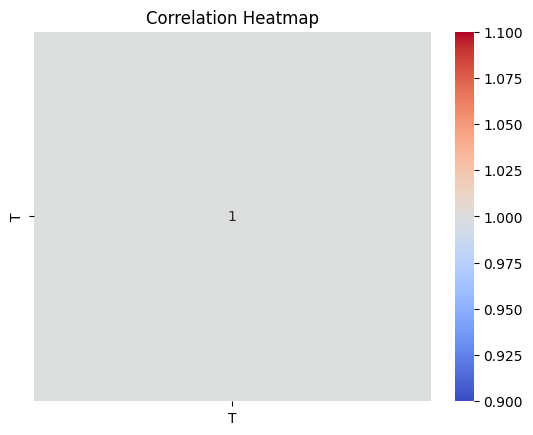

Training RNN...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1185/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0048 - val_loss: 3.2113e-04 - learning_rate: 0.0010
Epoch 2/100
1176/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5301e-04

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.5283e-04 - val_loss: 2.3561e-04 - learning_rate: 0.0010
Epoch 3/100
1172/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9310e-04

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.9295e-04 - val_loss: 2.0842e-04 - learning_rate: 0.0010
Epoch 4/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.5576e-04 - val_loss: 2.1757e-04 - learning_rate: 0.0010
Epoch 5/100
1183/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3323e-04

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.3324e-04 - val_loss: 1.8969e-04 - learning_rate: 0.0010
Epoch 6/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.2015e-04 - val_loss: 1.9147e-04 - learning_rate: 0.0010
Epoch 7/100
1175/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1469e-04

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.1470e-04 - val_loss: 1.7399e-04 - learning_rate: 0.0010
Epoch 8/100
1175/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1022e-04
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.1018e-04 - val_loss: 1.9552e-04 - learning_rate: 0.0010
Epoch 9/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.9098e-04 - val_loss: 2.1145e-04 - learning_rate: 5.0000e-04
Epoch 10/100
1181/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8881e-04

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.8881e-04 - val_loss: 1.6563e-04 - learning_rate: 5.0000e-04
Epoch 11/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.8792e-04 - val_loss: 1.6941e-04 - learning_rate: 5.0000e-04
Epoch 12/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.8665e-04 - val_loss: 1.7282e-04 - learning_rate: 5.0000e-04
Epoch 13/100
1182/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8204e-04
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.8205e-04 - val_loss: 1.8932e-04 - learning_rate: 5.0000e-04
Epoch 14/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.7141e-04 - val_loss: 1.6879e-04 - learning_rate: 2.5000e-04
Epoch 15/100
1171/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7751e-04

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.7749e-04 - val_loss: 1.6495e-04 - learning_rate: 2.5000e-04
Epoch 16/100
1177/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7460e-04

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.7461e-04 - val_loss: 1.6263e-04 - learning_rate: 2.5000e-04
Epoch 17/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.8228e-04 - val_loss: 1.7779e-04 - learning_rate: 2.5000e-04
Epoch 18/100
1175/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7386e-04
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.7388e-04 - val_loss: 1.6884e-04 - learning_rate: 2.5000e-04
Epoch 19/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.7051e-04 - val_loss: 1.6789e-04 - learning_rate: 1.2500e-04
Epoch 20/100
1182/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6812e-04

1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.6812e-04 - val_loss: 1.6141e-04 - learning_rate: 1.2500e-04
Epoch 21/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.6723e-04 - val_loss: 1.6439e-04 - learning_rate: 1.2500e-04
Epoch 22/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.6319e-04 - val_loss: 1.6441e-04 - learning_rate: 1.2500e-04
Epoch 23/100
1182/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7116e-04
Epoch 23: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.7115e-04 - val_loss: 1.6618e-04 - learning_rate: 1.2500e-04
Epoch 24/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.6459e-04 - val_loss: 1.6486e-04 - learning_rate: 6.2500e-05
Epoch 25/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.6797e-04 - val_loss: 1.7041e-04 - learning_rate: 6.2500e-05
Epoch 26/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.6925e-04 - val_loss: 1.6627e-04 - learning_rate: 6.25


Epoch 24: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.6025e-04 - val_loss: 1.6120e-04 - learning_rate: 1.2500e-04
Epoch 25/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2.6423e-04 - val_loss: 1.6904e-04 - learning_rate: 6.2500e-05
Epoch 26/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.6489e-04 - val_loss: 1.6801e-04 - learning_rate: 6.2500e-05
Epoch 27/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.6160e-04 - val_loss: 1.6520e-04 - learning_rate: 6.2500e-05
Epoch 28/100
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.5522e-04 - val_loss: 1.7239e-04 - learning_rate: 6.2500e-05
Epoch 29/100
1181/1185 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6836e-04
Epoch 29: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2.6834e-04 - val_loss: 1.6483e-04 - learning_rate: 6.2500e-05
Epoch 30/100
1185/1185 ━━━━━━━━━━━━━━━

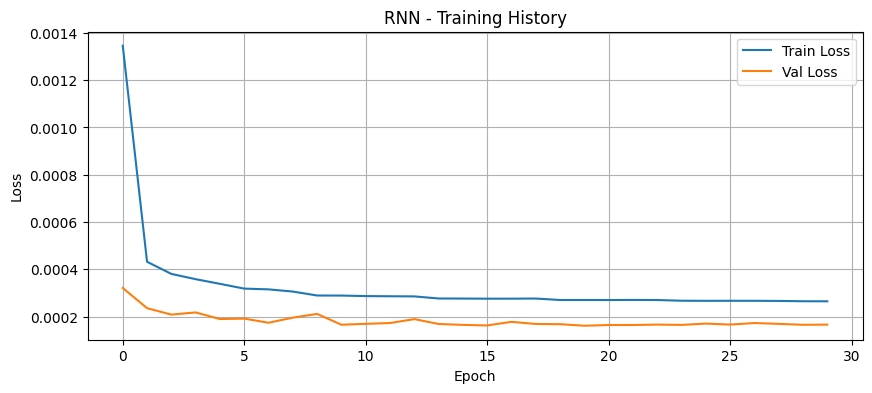

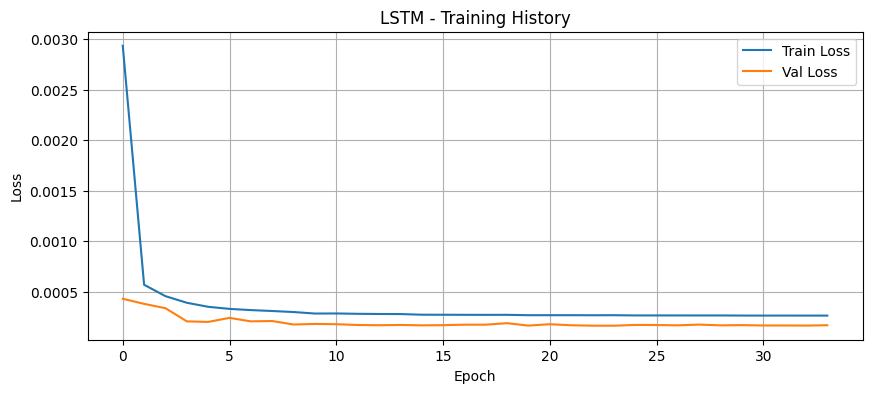

330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

RNN Evaluation:
  MSE : 0.0001
  RMSE: 0.0120
  MAE : 0.0079
  R²  : 0.9902
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

LSTM Evaluation:
  MSE : 0.0001
  RMSE: 0.0116
  MAE : 0.0075
  R²  : 0.9908


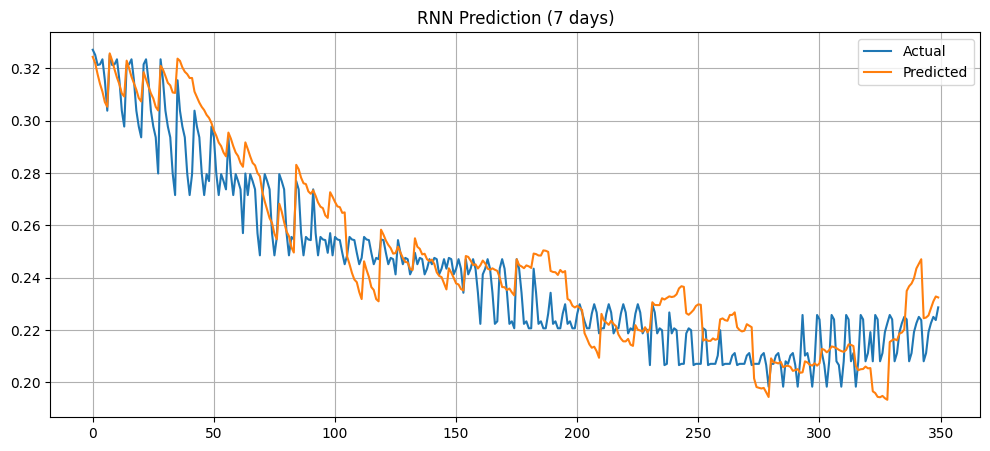

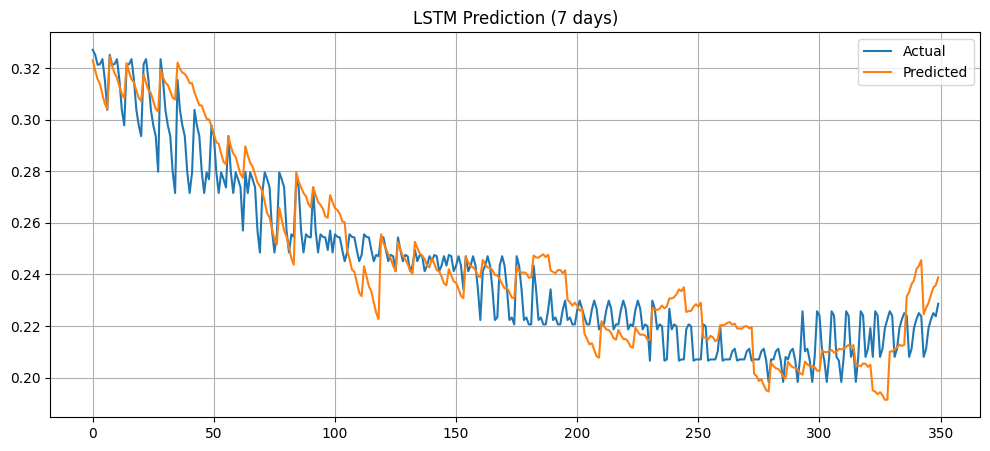

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 1. Load Dataset
df = pd.read_csv('cleaned_weather.csv', parse_dates=['date'])
df = df[['date', 'T']].dropna()
df = df.sort_values('date')

# 2. EDA
print(df.describe())
print(df.isnull().sum())
df['T'].plot(title='Temperature Over Time', figsize=(12, 4))
plt.show()

# 3. Heatmap Korelasi
correlation_matrix = df[['T']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4. Preprocessing
scaler = MinMaxScaler()
df['T_scaled'] = scaler.fit_transform(df[['T']])

# 5. Sequence generation (30 hari input → 7 hari output)
def create_sequences(data, input_len=30, output_len=7):
    X, y = [], []
    for i in range(len(data) - input_len - output_len + 1):
        X.append(data[i:i+input_len])
        y.append(data[i+input_len:i+input_len+output_len])
    return np.array(X), np.array(y)

series = df['T_scaled'].values
X, y = create_sequences(series, input_len=30, output_len=7)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train[..., np.newaxis]  # shape: (samples, 30, 1)
X_test = X_test[..., np.newaxis]

# 6. Build RNN & LSTM
def build_rnn(input_shape, output_len):
    model = Sequential([
        SimpleRNN(64, activation='tanh', input_shape=input_shape),
        Dense(output_len)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm(input_shape, output_len):
    model = Sequential([
        LSTM(64, activation='tanh', input_shape=input_shape),
        Dense(output_len)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model_rnn = build_rnn((30, 1), 7)
model_lstm = build_lstm((30, 1), 7)

# 7. Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(patience=5, factor=0.5, verbose=1)
callbacks = [early_stopping, checkpoint, reduce_lr]

# 8. Training
EPOCHS = 100
print("Training RNN...")
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

print("Training LSTM...")
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# 9. Evaluation Function
def evaluate(model, X, y, name):
    pred = model.predict(X)
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    print(f"\n{name} Evaluation:")
    print(f"  MSE : {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE : {mae:.4f}")
    print(f"  R²  : {r2:.4f}")
    return pred

# 10. Plot Loss vs Val Loss
def plot_training_history(history, title):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history_rnn, 'RNN')
plot_training_history(history_lstm, 'LSTM')

# 11. Evaluate & Plot
y_pred_rnn = evaluate(model_rnn, X_test, y_test, "RNN")
y_pred_lstm = evaluate(model_lstm, X_test, y_test, "LSTM")

def plot_result(y_true, y_pred, title):
    plt.figure(figsize=(12, 5))
    plt.plot(y_true[:50].flatten(), label='Actual')
    plt.plot(y_pred[:50].flatten(), label='Predicted')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_result(y_test, y_pred_rnn, "RNN Prediction (7 days)")
plot_result(y_test, y_pred_lstm, "LSTM Prediction (7 days)")


                                date             T
count                          52696  52696.000000
mean   2020-07-02 00:11:52.198269440     10.818241
min              2020-01-01 00:10:00     -6.440000
25%              2020-04-01 11:47:30      4.590000
50%              2020-07-02 00:45:00     10.230000
75%              2020-10-01 12:22:30     16.180000
max              2021-01-01 00:00:00     34.800000
std                              NaN      7.468671
date    0
T       0
dtype: int64


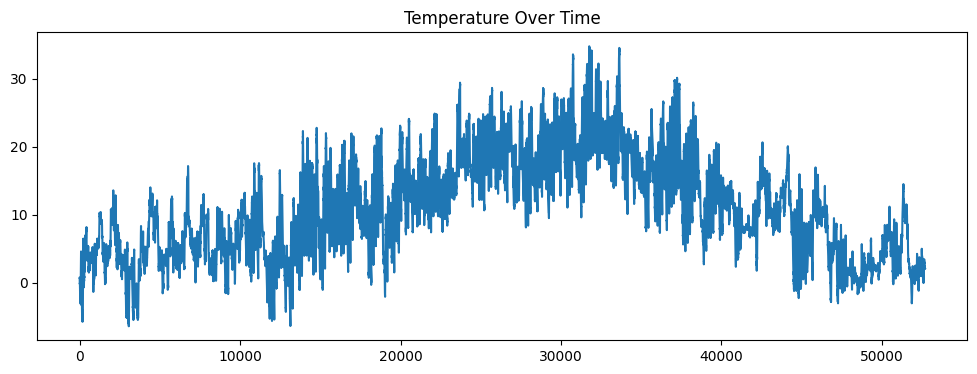

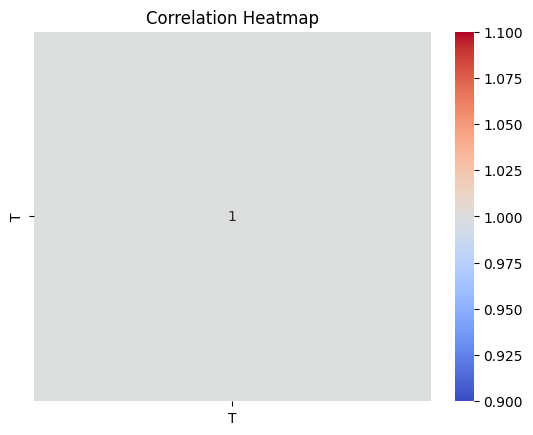


🔁 Training Model: RNN

Fold 1
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0089 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.5278e-04 - val_loss: 8.0754e-04 - learning_rate: 0.0010
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.6399e-04 - val_loss: 6.6839e-04 - learning_rate: 0.0010
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.1856e-04 - val_loss: 6.0262e-04 - learning_rate: 0.0010
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.9982e-04 - val_loss: 5.3983e-04 - learning_rate: 0.0010
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.7708e-04 - val_loss: 5.5180e-04 - learning_rate: 0.0010
Epoch 7/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.6277e-04 - val_loss: 5.3296e-04 - learning_rate: 0.0010
Epoch 8/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.7309e-04 - val_loss: 4.7581e-04 - learning_rate: 0.0010
Epoch 9/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.5806

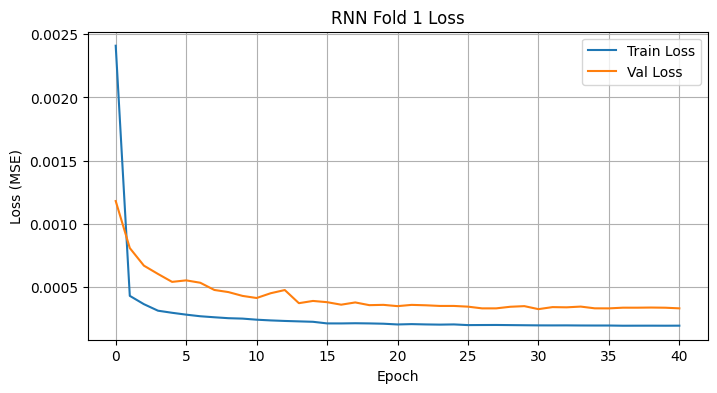

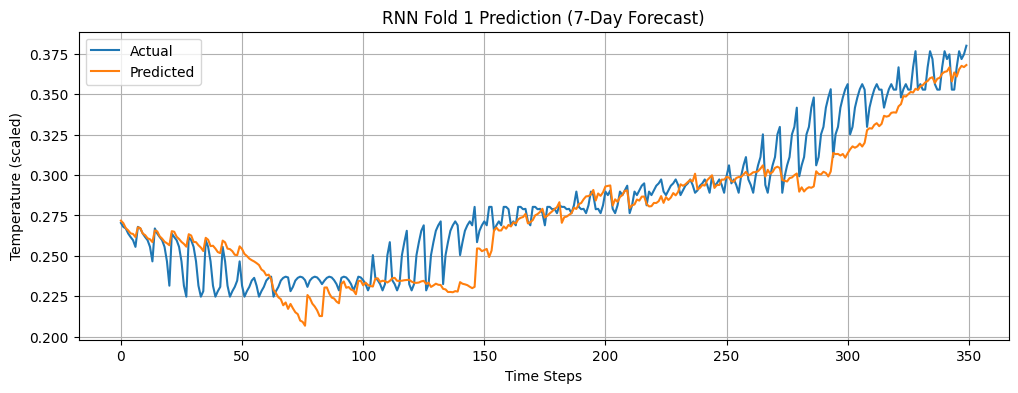


Fold 2
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


549/549 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0090 - val_loss: 6.6857e-04 - learning_rate: 0.0010
Epoch 2/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.3736e-04 - val_loss: 5.4822e-04 - learning_rate: 0.0010
Epoch 3/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.5240e-04 - val_loss: 4.3075e-04 - learning_rate: 0.0010
Epoch 4/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.2553e-04 - val_loss: 4.1584e-04 - learning_rate: 0.0010
Epoch 5/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.0771e-04 - val_loss: 4.0532e-04 - learning_rate: 0.0010
Epoch 6/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.9120e-04 - val_loss: 3.6794e-04 - learning_rate: 0.0010
Epoch 7/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.8233e-04 - val_loss: 5.0451e-04 - learning_rate: 0.0010
Epoch 8/100
539/549 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8572e-04
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms

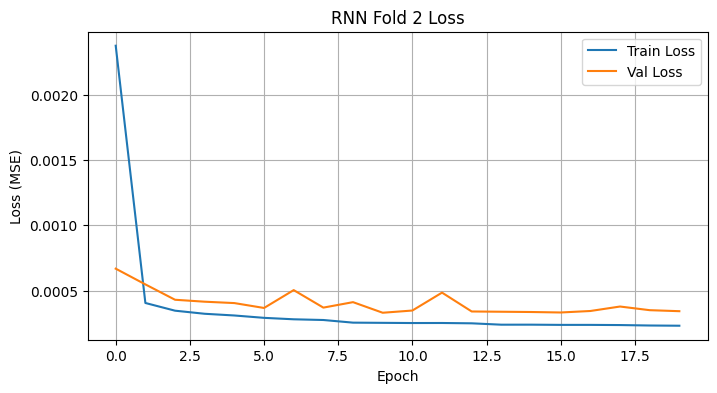

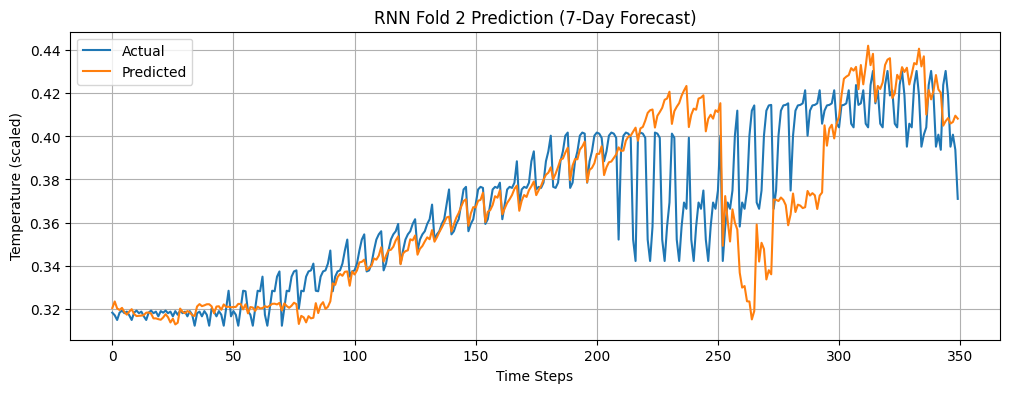


Fold 3
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


823/823 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0067 - val_loss: 6.1541e-04 - learning_rate: 0.0010
Epoch 2/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.5535e-04 - val_loss: 5.6148e-04 - learning_rate: 0.0010
Epoch 3/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.7315e-04 - val_loss: 5.6988e-04 - learning_rate: 0.0010
Epoch 4/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.6249e-04 - val_loss: 6.0907e-04 - learning_rate: 0.0010
Epoch 5/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3693e-04 - val_loss: 3.8690e-04 - learning_rate: 0.0010
Epoch 6/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.2412e-04 - val_loss: 4.1747e-04 - learning_rate: 0.0010
Epoch 7/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.1842e-04 - val_loss: 4.6973e-04 - learning_rate: 0.0010
Epoch 8/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.9886e-04 - val_loss: 4.0704e-04 - learning_rate: 0.0010
Epoch 9/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.9

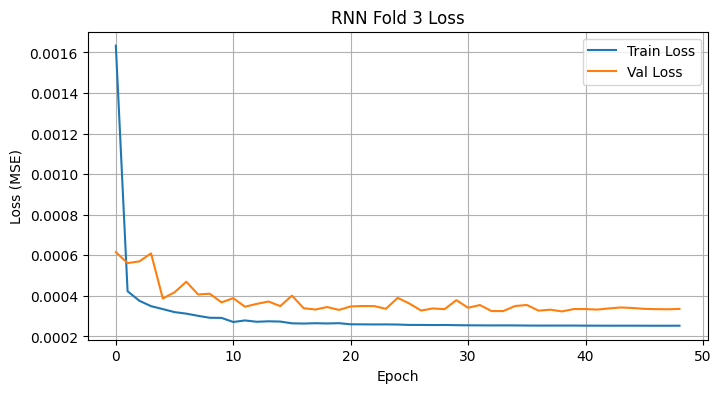

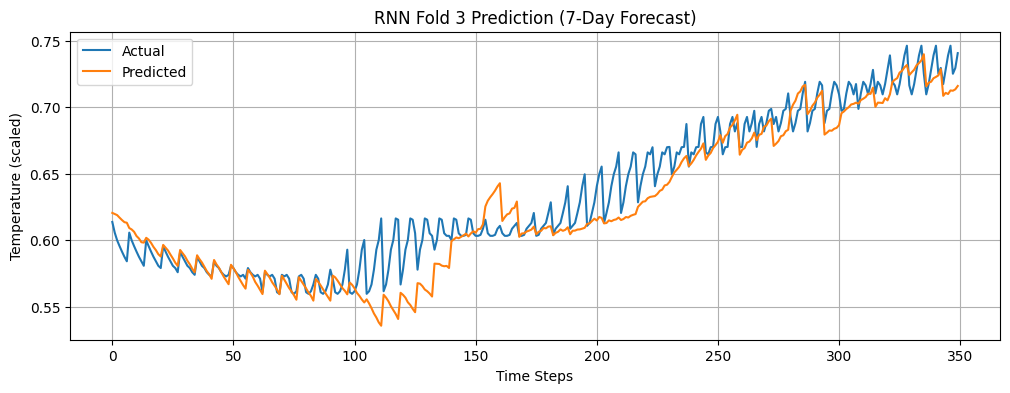


Fold 4
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0099 - val_loss: 3.7342e-04 - learning_rate: 0.0010
Epoch 2/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.4250e-04 - val_loss: 3.6180e-04 - learning_rate: 0.0010
Epoch 3/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.0032e-04 - val_loss: 2.6254e-04 - learning_rate: 0.0010
Epoch 4/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.6213e-04 - val_loss: 2.6753e-04 - learning_rate: 0.0010
Epoch 5/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.5009e-04 - val_loss: 3.8208e-04 - learning_rate: 0.0010
Epoch 6/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.4307e-04 - val_loss: 2.9676e-04 - learning_rate: 0.0010
Epoch 7/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.2868e-04 - val_loss: 2.4585e-04 - learning_rate: 0.0010
Epoch 8/100
1094/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2085e-04
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1098/1098 ━━━━━━━━━

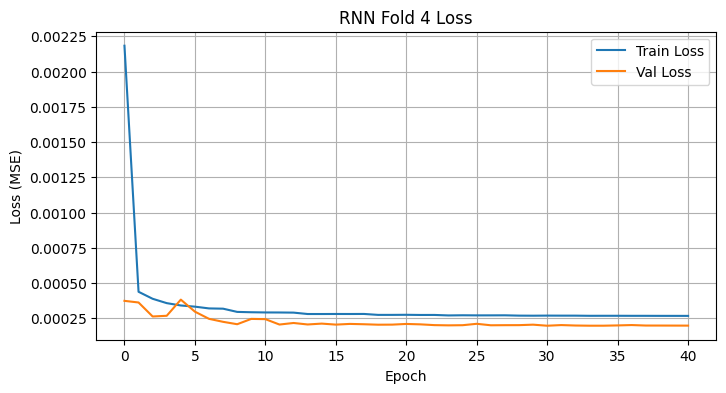

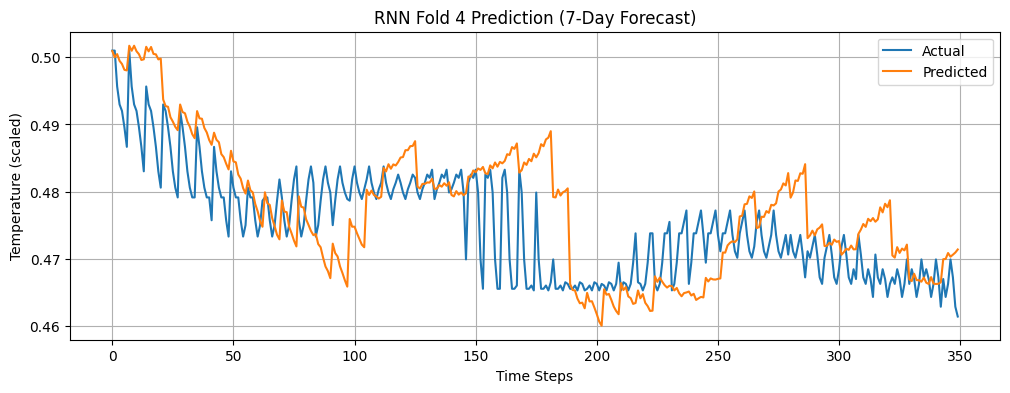


Fold 5
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1372/1372 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0052 - val_loss: 3.4236e-04 - learning_rate: 0.0010
Epoch 2/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.4229e-04 - val_loss: 2.1990e-04 - learning_rate: 0.0010
Epoch 3/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.7504e-04 - val_loss: 1.5654e-04 - learning_rate: 0.0010
Epoch 4/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.4391e-04 - val_loss: 1.5041e-04 - learning_rate: 0.0010
Epoch 5/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.1199e-04 - val_loss: 1.8118e-04 - learning_rate: 0.0010
Epoch 6/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 3.0523e-04 - val_loss: 2.0670e-04 - learning_rate: 0.0010
Epoch 7/100
1363/1372 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0004e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 3.0003e-04 - val_loss: 1.4638e-04 - learning_rate: 0.0010
Epoch 8/100
1372/1372 ━━━━━━

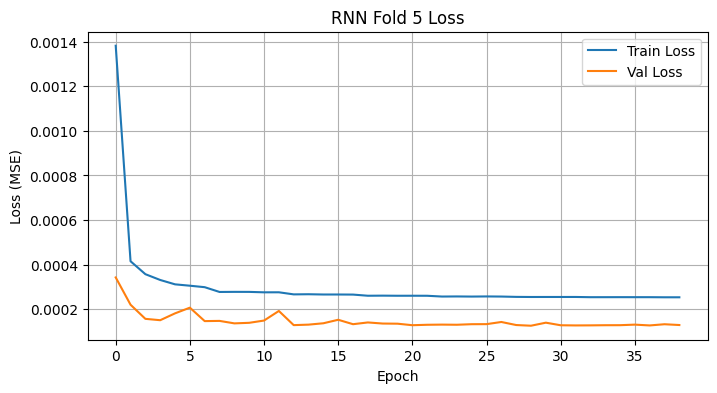

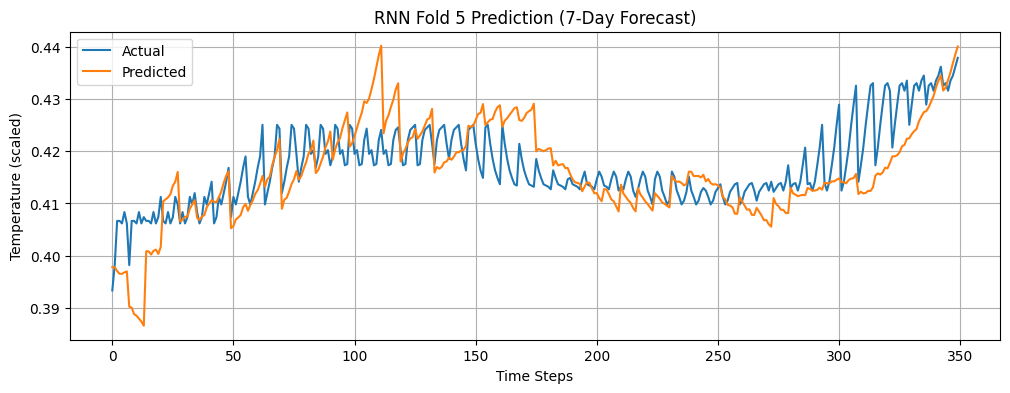


🔁 Training Model: LSTM

Fold 1
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0116 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.5459e-04 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4.4624e-04 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.1972e-04 - val_loss: 8.0627e-04 - learning_rate: 0.0010
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.5354e-04 - val_loss: 6.8742e-04 - learning_rate: 0.0010
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.4004e-04 - val_loss: 6.0939e-04 - learning_rate: 0.0010
Epoch 7/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3.1877e-04 - val_loss: 5.5809e-04 - learning_rate: 0.0010
Epoch 8/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.0162e-04 - val_loss: 4.9673e-04 - learning_rate: 0.0010
Epoch 9/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.7923e-04 -

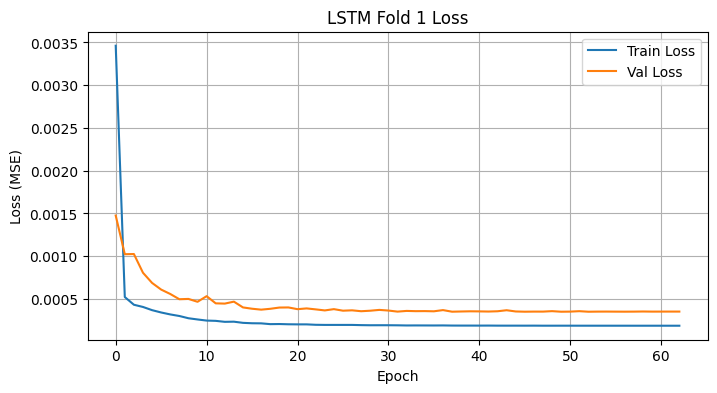

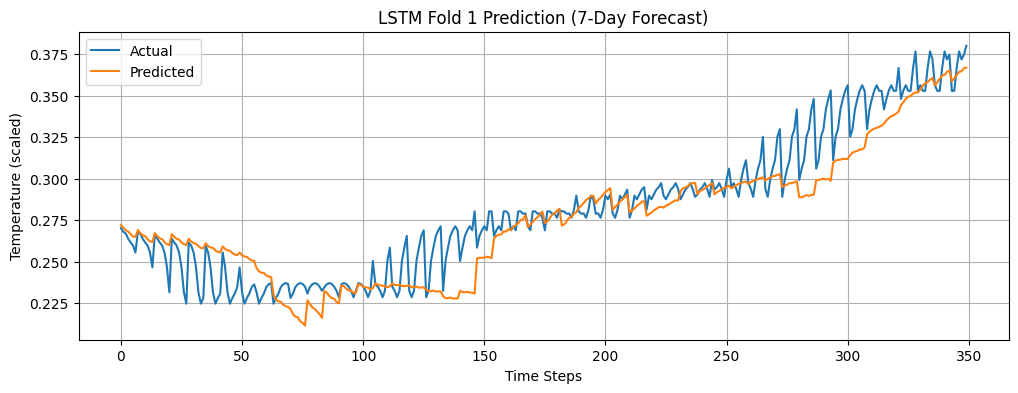


Fold 2
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


549/549 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0091 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 2/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 5.3773e-04 - val_loss: 6.9288e-04 - learning_rate: 0.0010
Epoch 3/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4.6820e-04 - val_loss: 6.0749e-04 - learning_rate: 0.0010
Epoch 4/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4.0090e-04 - val_loss: 5.0077e-04 - learning_rate: 0.0010
Epoch 5/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.6259e-04 - val_loss: 4.3500e-04 - learning_rate: 0.0010
Epoch 6/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.2827e-04 - val_loss: 3.9114e-04 - learning_rate: 0.0010
Epoch 7/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.0499e-04 - val_loss: 4.8030e-04 - learning_rate: 0.0010
Epoch 8/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.0449e-04 - val_loss: 4.4838e-04 - learning_rate: 0.0010
Epoch 9/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 2.7679e

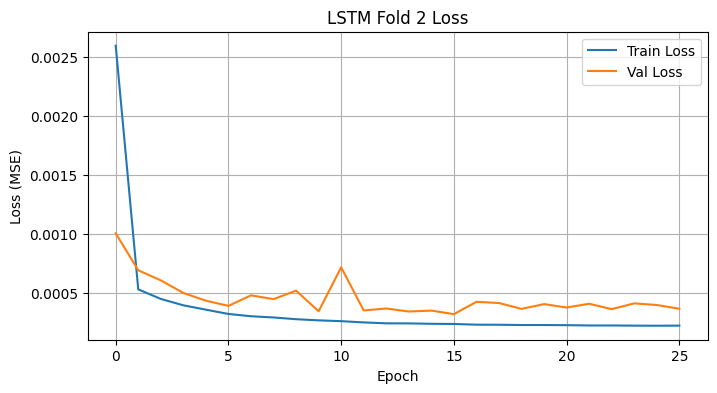

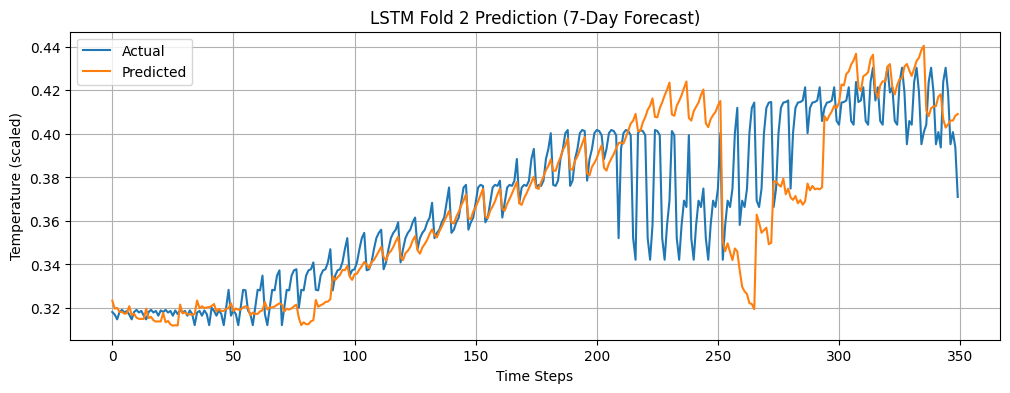


Fold 3
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


823/823 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0124 - val_loss: 7.0522e-04 - learning_rate: 0.0010
Epoch 2/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6.1681e-04 - val_loss: 5.8677e-04 - learning_rate: 0.0010
Epoch 3/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 5.0689e-04 - val_loss: 5.0221e-04 - learning_rate: 0.0010
Epoch 4/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.2991e-04 - val_loss: 4.3905e-04 - learning_rate: 0.0010
Epoch 5/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.7349e-04 - val_loss: 4.1281e-04 - learning_rate: 0.0010
Epoch 6/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.4184e-04 - val_loss: 3.7602e-04 - learning_rate: 0.0010
Epoch 7/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3.1822e-04 - val_loss: 5.6506e-04 - learning_rate: 0.0010
Epoch 8/100
823/823 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.0603e-04 - val_loss: 4.1742e-04 - learning_rate: 0.0010
Epoch 9/100
813/823 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2

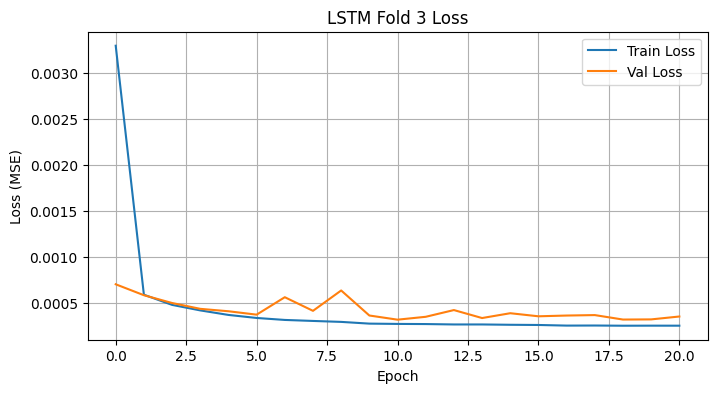

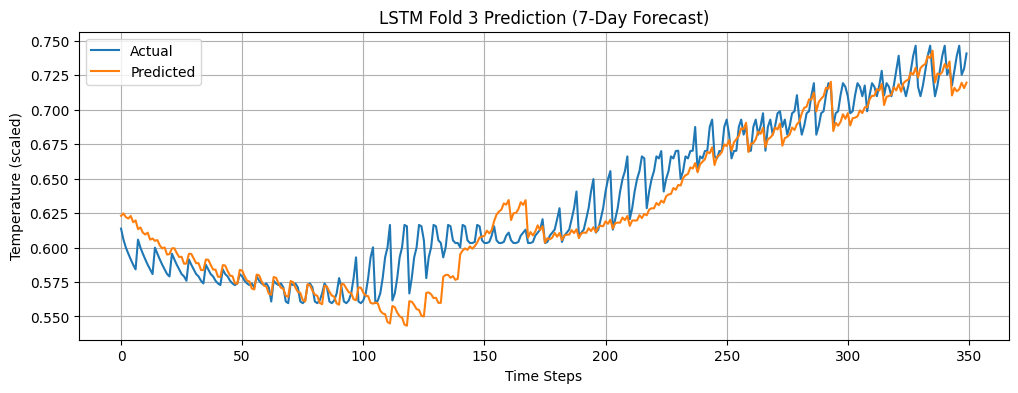


Fold 4
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0124 - val_loss: 4.9351e-04 - learning_rate: 0.0010
Epoch 2/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 5.9282e-04 - val_loss: 3.7915e-04 - learning_rate: 0.0010
Epoch 3/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.4932e-04 - val_loss: 3.3981e-04 - learning_rate: 0.0010
Epoch 4/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 3.9473e-04 - val_loss: 2.4797e-04 - learning_rate: 0.0010
Epoch 5/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.5529e-04 - val_loss: 2.6163e-04 - learning_rate: 0.0010
Epoch 6/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 3.3406e-04 - val_loss: 2.5118e-04 - learning_rate: 0.0010
Epoch 7/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.1919e-04 - val_loss: 2.3688e-04 - learning_rate: 0.0010
Epoch 8/100
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3.2174e-04 - val_loss: 2.1946e-04 - learning_rate: 0.0010
Epoch 9/100
1091/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 6

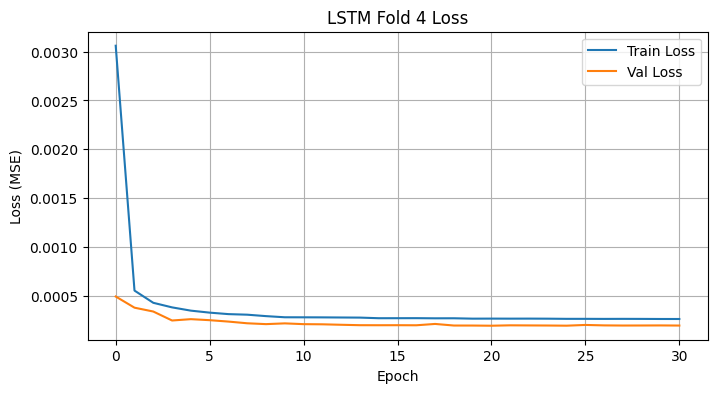

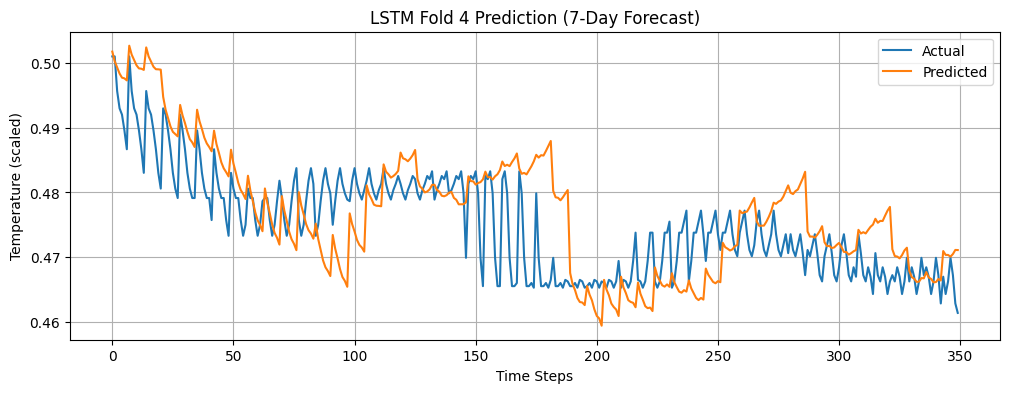


Fold 5
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0102 - val_loss: 3.7524e-04 - learning_rate: 0.0010
Epoch 2/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 5.4823e-04 - val_loss: 2.3381e-04 - learning_rate: 0.0010
Epoch 3/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.0562e-04 - val_loss: 2.2833e-04 - learning_rate: 0.0010
Epoch 4/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.4771e-04 - val_loss: 1.6153e-04 - learning_rate: 0.0010
Epoch 5/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.1717e-04 - val_loss: 1.5283e-04 - learning_rate: 0.0010
Epoch 6/100
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 3.0670e-04 - val_loss: 1.6204e-04 - learning_rate: 0.0010
Epoch 7/100
1367/1372 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9350e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 2.9348e-04 - val_loss: 1.3782e-04 - learning_rate: 0.0010
Epoch 8/100
1372/1372 ━━━━

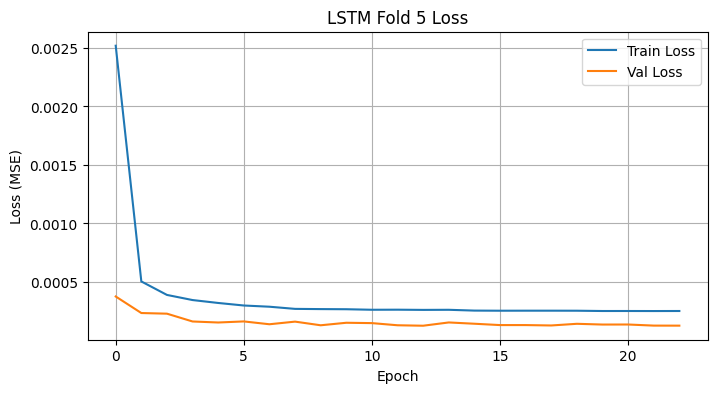

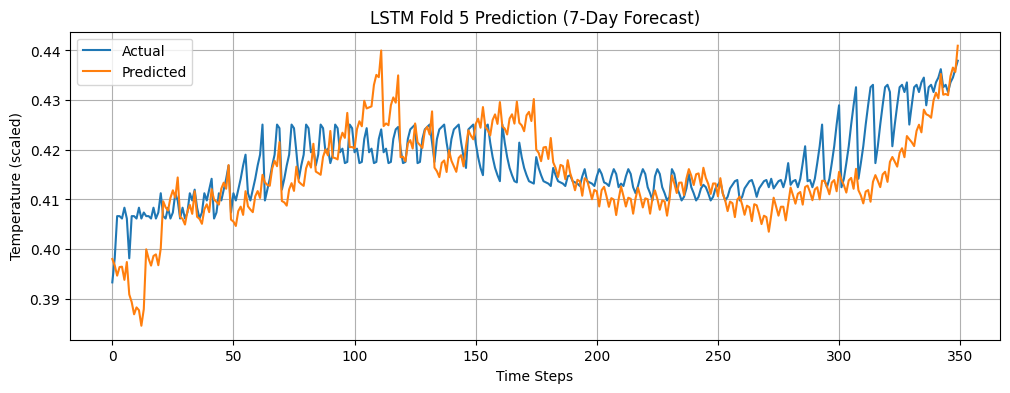


 Average Metrics per Model:
       Fold       MSE      RMSE       MAE        R2
Model                                              
LSTM    3.0  0.000263  0.015943  0.010437  0.983445
RNN     3.0  0.000260  0.015886  0.010223  0.983544


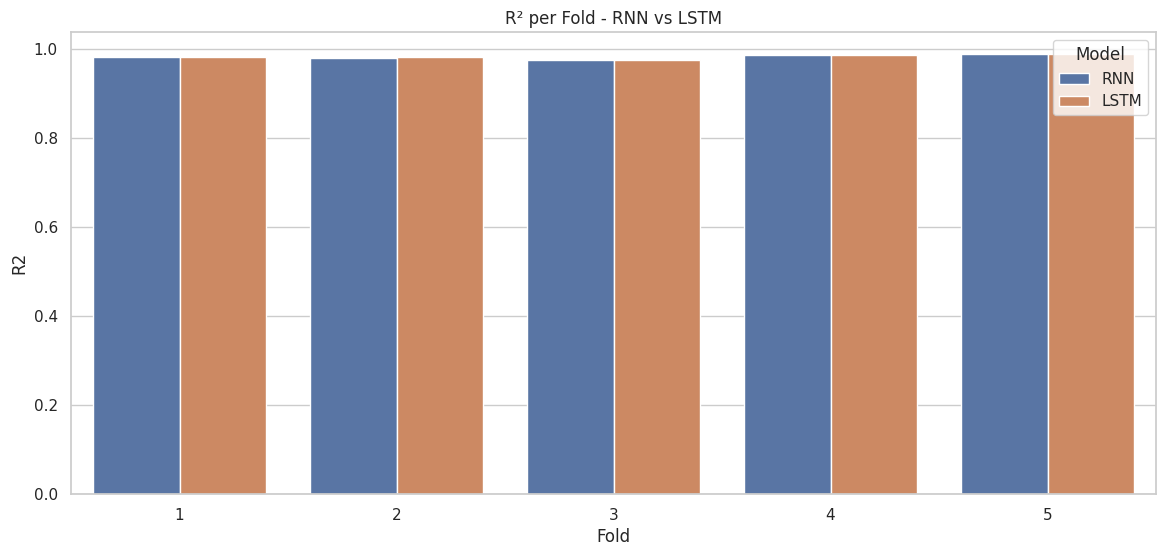

In [7]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 2. Load Dataset
df = pd.read_csv('cleaned_weather.csv', parse_dates=['date'])
df = df[['date', 'T']].dropna().sort_values('date')

# 3. EDA & Heatmap
print(df.describe())
print(df.isnull().sum())
plt.figure(figsize=(12,4))
df['T'].plot(title='Temperature Over Time')
plt.show()

sns.heatmap(df[['T']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4. Preprocessing
scaler = MinMaxScaler()
df['T_scaled'] = scaler.fit_transform(df[['T']])

# 5. Sequence generation
def create_sequences(data, input_len=30, output_len=7):
    X, y = [], []
    for i in range(len(data) - input_len - output_len + 1):
        X.append(data[i:i+input_len])
        y.append(data[i+input_len:i+input_len+output_len])
    return np.array(X), np.array(y)

series = df['T_scaled'].values
X, y = create_sequences(series, input_len=30, output_len=7)
X = X[..., np.newaxis]

# 6. Build Model
def build_model(model_type, input_shape, output_len):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(64, activation='tanh', input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(64, activation='tanh', input_shape=input_shape))
    model.add(Dense(output_len))
    model.compile(optimizer='adam', loss='mse')
    return model

# 7. K-Fold Cross Validation
tscv = TimeSeriesSplit(n_splits=5)
EPOCHS = 100
results = {'Model': [], 'Fold': [], 'MSE': [], 'RMSE': [], 'MAE': [], 'R2': []}

for model_type in ['RNN', 'LSTM']:
    print(f"\n🔁 Training Model: {model_type}")
    fold = 1
    for train_index, val_index in tscv.split(X):
        print(f"\nFold {fold}")
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = build_model(model_type, (X.shape[1], X.shape[2]), y.shape[1])

        callbacks = [
            EarlyStopping(patience=10, restore_best_weights=True),
            ModelCheckpoint(f'{model_type}_fold{fold}.keras', save_best_only=True),
            ReduceLROnPlateau(patience=5, factor=0.5, verbose=1)
        ]

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=EPOCHS,
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )

        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        results['Model'].append(model_type)
        results['Fold'].append(fold)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['MAE'].append(mae)
        results['R2'].append(r2)

        # Plot Loss
        plt.figure(figsize=(8, 4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{model_type} Fold {fold} Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot Prediction
        plt.figure(figsize=(12, 4))
        plt.plot(y_val[:50].flatten(), label='Actual')
        plt.plot(y_pred[:50].flatten(), label='Predicted')
        plt.title(f'{model_type} Fold {fold} Prediction (7-Day Forecast)')
        plt.xlabel('Time Steps')
        plt.ylabel('Temperature (scaled)')
        plt.legend()
        plt.grid(True)
        plt.show()

        fold += 1

# 8. Summary
results_df = pd.DataFrame(results)
print("\n Average Metrics per Model:")
print(results_df.groupby('Model').mean(numeric_only=True))

# 9. Visualisasi per Fold
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))
sns.barplot(data=results_df, x='Fold', y='R2', hue='Model')
plt.title("R² per Fold - RNN vs LSTM")
plt.show()
